In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

/tmp/ipykernel_15337/2703235455.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Loading Common Questions and Hard Questions Evaluation Data
phi_eval_c = pd.DataFrame(json.loads(open("./data/phi2_eval_df_c.json", "r").read()))
phi_eval_h = pd.DataFrame(json.loads(open("./data/phi2_eval_hard.json", "r").read()))
def_eval_c = pd.DataFrame(json.loads(open("./data/sqlc_eval_df_c.json", "r").read()))
def_eval_h = pd.DataFrame(json.loads(open("./data/sqlc_eval_hard.json", "r").read()))

# Loading Training Logs for Fine-tuning Phi-2
# training_logs = pd.read_csv("./data/training_logs.csv")

phi_eval_c.shape, phi_eval_h.shape, def_eval_c.shape, def_eval_h.shape
# , training_logs.shape

((1258, 9), (33, 9), (1258, 9), (33, 9))

In [3]:
phi_eval = pd.concat([phi_eval_c, phi_eval_h])
def_eval = pd.concat([def_eval_c, def_eval_h])

phi_eval.shape, def_eval.shape

((1291, 9), (1291, 9))

In [4]:
phi_eval['tokens_per_inf'] = (phi_eval['token_in'] + phi_eval['token_out'])/phi_eval['inf_time']
def_eval['tokens_per_inf'] = (def_eval['token_in'] + def_eval['token_out'])/def_eval['inf_time']

phi_eval['all_tokens'] = phi_eval['token_in'] + phi_eval['token_out']
def_eval['all_tokens'] = def_eval['token_in'] + def_eval['token_out']

phi_eval['question'] = phi_eval['prompt'].apply(lambda x :x.split("`")[1])
def_eval['question'] = def_eval['prompt'].apply(lambda x :x.split("`")[1])

phi_eval['context'] = phi_eval['prompt'].apply(lambda x :x.split("schema:\n")[-1].split("\n\n")[0])
def_eval['context'] = def_eval['prompt'].apply(lambda x :x.split("schema:\n")[-1].split("\n\n")[0])

In [5]:
# Plot between time and difficulty
phi_eval.groupby('difficulty')['inf_time'].mean().reset_index()

,difficulty,inf_time
0,easy,16.261769
1,hard,38.548714
2,medium,20.397285


In [6]:
def_eval.sort_values(by='inf_time', ascending=False).head(10)

,prompt,pred,actu,inf_time,temperature,difficulty,token_in,token_out,tokens_per_sec,tokens_per_inf,all_tokens,question,context
0,### Task\nGenerate a SQL query to answer the f...,"SELECT MAX(g.gradepoint) AS max_grade_point, M...","SELECT MAX(T2.gradepoint), MIN(T2.gradepoint) ...",468.298223,0.2,hard,145,64,0.134530,0.446297,209,What is the maximum and minimum grade point of...,"CREATE TABLE ENROLLED_IN (Grade VARCHAR, StuID..."
17,### Task\nGenerate a SQL query to answer the f...,"SELECT t.task_details, t.task_id, t.project_id...","SELECT T1.task_details, T1.task_id, T2.project...",66.946423,0.2,hard,174,112,1.658042,4.272073,286,"What are the task details, task id and project...","CREATE TABLE Projects (project_id VARCHAR, pro..."
9,### Task\nGenerate a SQL query to answer the f...,"SELECT t.month, t._year FROM table_name_24 t W...","SELECT month, _year FROM table_name_24 WHERE g...",64.969241,0.2,medium,259,51,0.769595,4.771489,310,What is the month and year less than 5 German ...,"CREATE TABLE table_name_24 (month VARCHAR, _ye..."
28,### Task\nGenerate a SQL query to answer the f...,SELECT ta.name FROM Tourist_Attractions ta JOI...,SELECT T1.Name FROM Tourist_Attractions AS T1 ...,64.069760,0.2,hard,169,107,1.654447,4.307804,276,What are the names of tourist attraction that ...,CREATE TABLE VISITS (Tourist_Attraction_ID VAR...
640,### Task\nGenerate a SQL query to answer the f...,SELECT t.location FROM table_name_77 t WHERE t...,SELECT location FROM table_name_77 WHERE faste...,62.517787,0.2,medium,174,51,0.799772,3.598976,225,"What is Location, when Fastest Lap is Ben Spie...","CREATE TABLE table_name_77 (location VARCHAR, ..."
645,### Task\nGenerate a SQL query to answer the f...,SELECT SUM(t.murder_and_non_negligent_manslaug...,SELECT SUM(murder_and_non_negligent_manslaught...,62.196819,0.2,medium,205,51,0.803900,4.115966,256,What is the total rate of murder and non-negli...,CREATE TABLE table_name_86 (murder_and_non_neg...
27,### Task\nGenerate a SQL query to answer the f...,"SELECT c.characteristic_name, c.characteristic...",SELECT t3.characteristic_name FROM products AS...,59.192611,0.2,hard,157,108,1.807658,4.476910,265,"List all characteristics of product named ""ses...",CREATE TABLE CHARACTERISTICS (characteristic_n...
1228,### Task\nGenerate a SQL query to answer the f...,SELECT AVG(t.robbery) AS average_robbery FROM ...,SELECT AVG(robbery) FROM table_name_40 WHERE n...,58.499356,0.2,medium,227,51,0.854710,4.752189,278,Which average Robbery has the following criter...,"CREATE TABLE table_name_40 (robbery INTEGER, c..."
25,### Task\nGenerate a SQL query to answer the f...,SELECT ta.Name FROM Tourist_Attractions ta JOI...,SELECT T1.Name FROM Tourist_Attractions AS T1 ...,58.422613,0.2,hard,170,89,1.506266,4.433215,259,What are the names of the tourist attractions ...,CREATE TABLE Tourist_Attraction_Features (tour...
4,### Task\nGenerate a SQL query to answer the f...,SELECT COUNT(DISTINCT hp.petid) AS number_of_p...,SELECT COUNT(*) FROM student AS T1 JOIN has_pe...,58.020722,0.2,hard,138,51,0.861761,3.257457,189,Find the number of dog pets that are raised by...,"CREATE TABLE has_pet (stuid VARCHAR, petid VAR..."


<Axes: title={'center': 'Phi-2 Model'}, xlabel='all_tokens', ylabel='inf_time'>

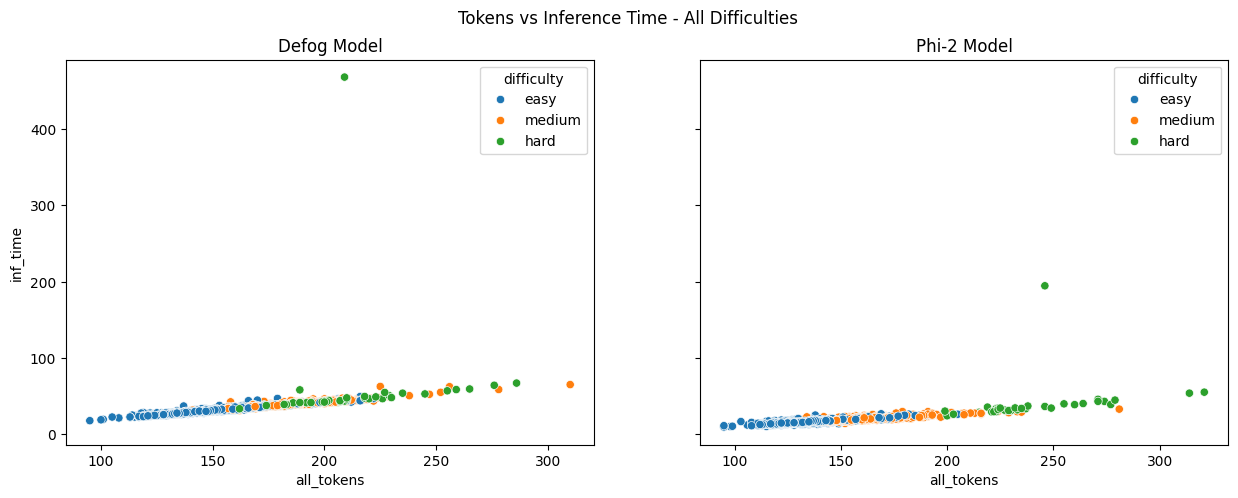

In [7]:
# tokens vs inf_time
figure, axes = plt.subplots(1, 2, sharey=True,
                            figsize=(15, 5))
figure.suptitle('Tokens vs Inference Time - All Difficulties')

axes[0].set_title('Defog Model')
sns.scatterplot(def_eval, x="all_tokens", y="inf_time", hue="difficulty", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.scatterplot(phi_eval, x="all_tokens", y="inf_time", hue="difficulty", ax=axes[1])

<Axes: title={'center': 'Phi-2 Model'}, xlabel='all_tokens', ylabel='inf_time'>

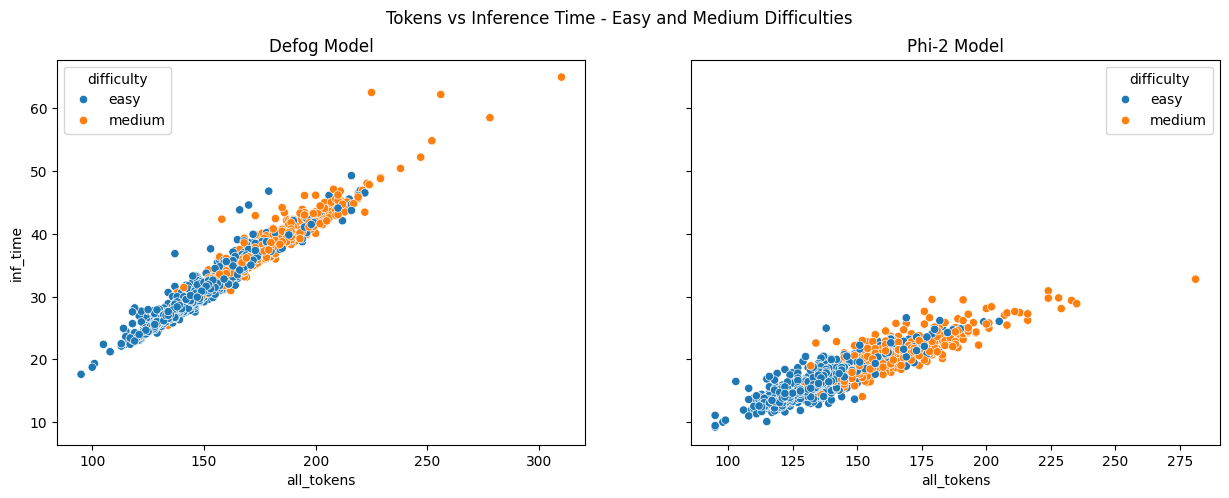

In [8]:
# tokens vs inf_time
figure, axes = plt.subplots(1, 2, sharey=True,
                            figsize=(15, 5))
figure.suptitle('Tokens vs Inference Time - Easy and Medium Difficulties')

axes[0].set_title('Defog Model')
sns.scatterplot(def_eval[def_eval['difficulty'].isin(['easy', 'medium'])], x="all_tokens", y="inf_time", hue="difficulty", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.scatterplot(phi_eval[phi_eval['difficulty'].isin(['easy', 'medium'])], x="all_tokens", y="inf_time", hue="difficulty", ax=axes[1])

In [9]:
phi_eval.groupby('difficulty')['tokens_per_inf'].mean().reset_index().sort_values('tokens_per_inf')

,difficulty,tokens_per_inf
1,hard,6.829720
2,medium,8.058363
0,easy,8.390820


<Axes: title={'center': 'Phi-2 Model'}, xlabel='tokens_per_inf', ylabel='difficulty'>

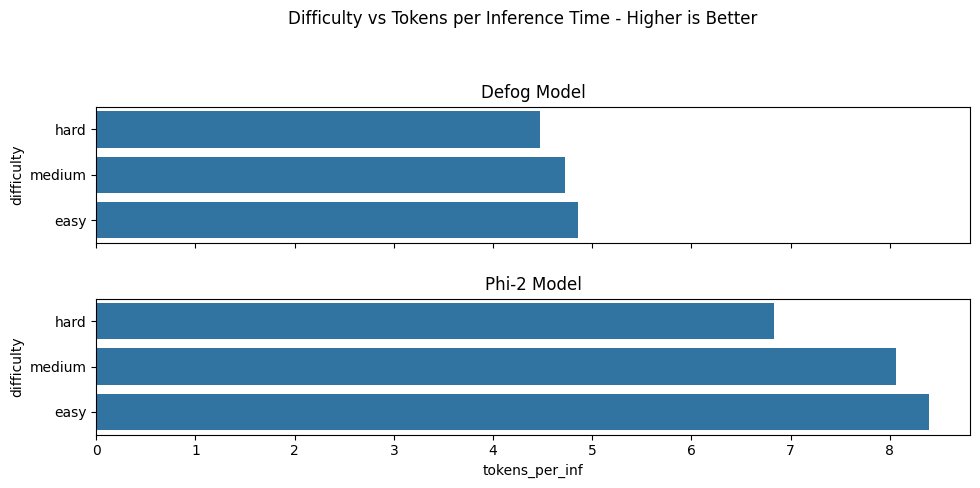

In [10]:
# diffculty vs tokens_per_inf_time - bar
figure, axes = plt.subplots(2, 1, sharex=True,
                            figsize=(10, 5))
figure.suptitle('Difficulty vs Tokens per Inference Time - Higher is Better')
figure.tight_layout(pad=3)

axes[0].set_title('Defog Model')
sns.barplot(def_eval.groupby('difficulty')['tokens_per_inf'].mean().reset_index().sort_values('tokens_per_inf'),y="difficulty", x="tokens_per_inf", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.barplot(phi_eval.groupby('difficulty')['tokens_per_inf'].mean().reset_index().sort_values('tokens_per_inf'),y="difficulty", x="tokens_per_inf", ax=axes[1])

<Axes: title={'center': 'Phi-2 Model'}, xlabel='token_out', ylabel='difficulty'>

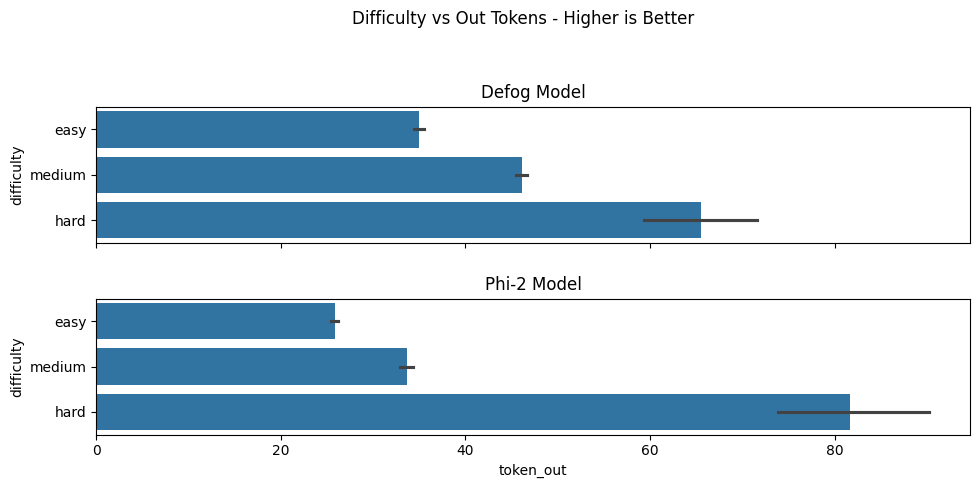

In [11]:
# diffculty vs out tokens - bar
figure, axes = plt.subplots(2, 1, sharex=True,
                            figsize=(10, 5))
figure.suptitle('Difficulty vs Out Tokens - Higher is Better')
figure.tight_layout(pad=3)

axes[0].set_title('Defog Model')
sns.barplot(def_eval, y="difficulty", x="token_out", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.barplot(phi_eval, y="difficulty", x="token_out", ax=axes[1])

<Axes: title={'center': 'Phi-2 Model'}, xlabel='inf_time', ylabel='difficulty'>

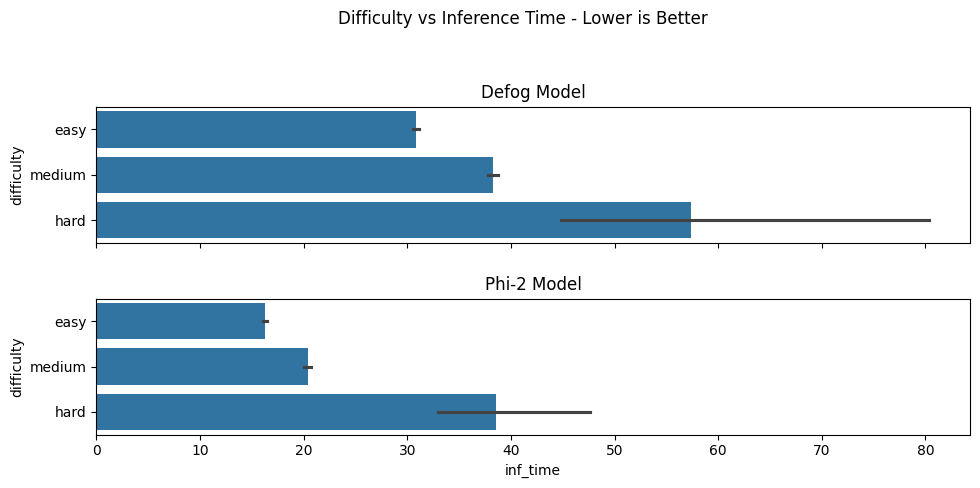

In [12]:
# diffculty vs inf_time - bar
figure, axes = plt.subplots(2, 1, sharex=True,
                            figsize=(10, 5))
figure.suptitle('Difficulty vs Inference Time - Lower is Better')
figure.tight_layout(pad=3)

axes[0].set_title('Defog Model')
sns.barplot(def_eval, y="difficulty", x="inf_time", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.barplot(phi_eval, y="difficulty", x="inf_time", ax=axes[1])

In [88]:
import sqlite3

## Create DB schema based on context and run the query to check for execution.
def execution_test(row):
    conn = sqlite3.connect(':memory:') 
    script = row['context']
    success = True
    try:
        conn.executescript(script)
        sql_query = pd.read_sql_query(row['pred'], conn)
    except:
        success = False
    return success

phi_eval['exec_success'] = phi_eval.apply(lambda x: execution_test(x), axis=1)
def_eval['exec_success'] = def_eval.apply(lambda x: execution_test(x), axis=1)

<Axes: title={'center': 'Phi-2 Model'}, xlabel='difficulty', ylabel='count'>

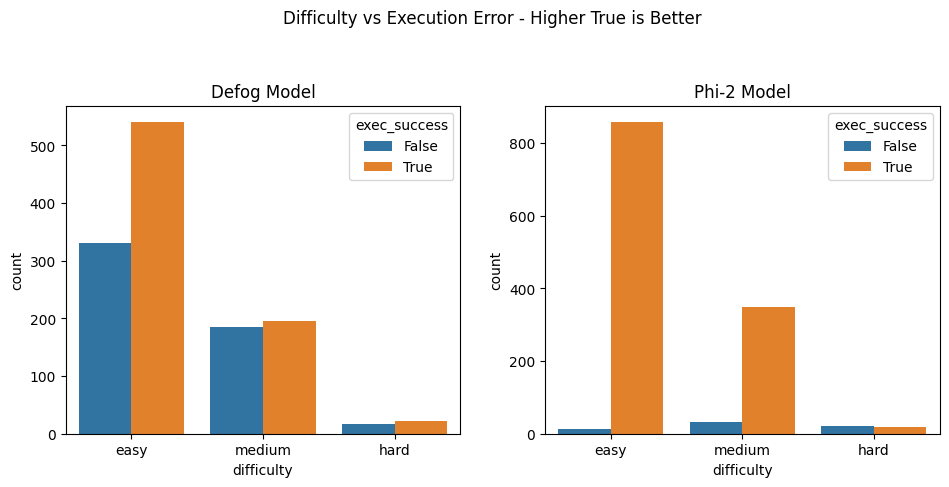

In [92]:
# diffculty vs inf_time - bar
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(10, 5))
figure.suptitle('Difficulty vs Execution Error - Higher True is Better')
figure.tight_layout(pad=3)

axes[0].set_title('Defog Model')
sns.countplot(def_eval, x="difficulty", ax=axes[0], hue="exec_success")

axes[1].set_title('Phi-2 Model')
sns.countplot(phi_eval, x="difficulty", ax=axes[1], hue="exec_success")

In [93]:
## Check perfect matches based on the actual value
phi_eval['exact_match'] = phi_eval['pred'].str.lower().str.strip() == phi_eval['actu'].str.lower().str.strip()
def_eval['exact_match'] = def_eval['pred'].str.lower().str.strip() == def_eval['actu'].str.lower().str.strip()

<Axes: title={'center': 'Phi-2 Model'}, xlabel='difficulty', ylabel='count'>

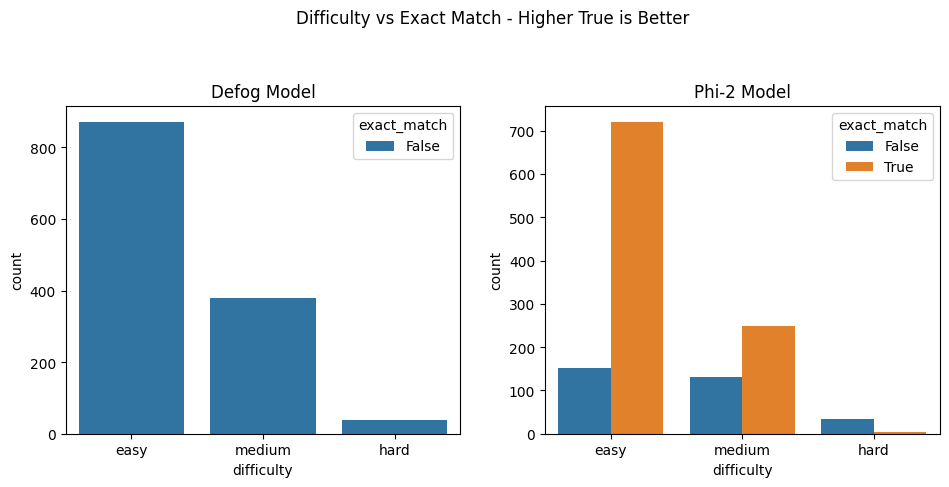

In [95]:
# diffculty vs inf_time - bar
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(10, 5))
figure.suptitle('Difficulty vs Exact Match - Higher True is Better')
figure.tight_layout(pad=3)

axes[0].set_title('Defog Model')
sns.countplot(def_eval, x="difficulty", ax=axes[0], hue="exact_match")

axes[1].set_title('Phi-2 Model')
sns.countplot(phi_eval, x="difficulty", ax=axes[1], hue="exact_match")